/var/folders/2l/0dv3zdh51_d154b7z7_q096c0000gn/T/ipykernel_4669/965811609.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


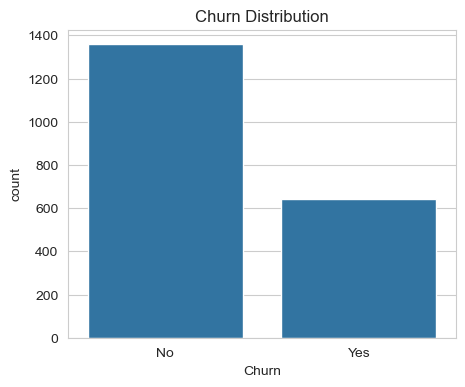

Accuracy: 0.6475
              precision    recall  f1-score   support

       False       0.71      0.81      0.76       272
        True       0.43      0.31      0.36       128

    accuracy                           0.65       400
   macro avg       0.57      0.56      0.56       400
weighted avg       0.62      0.65      0.63       400



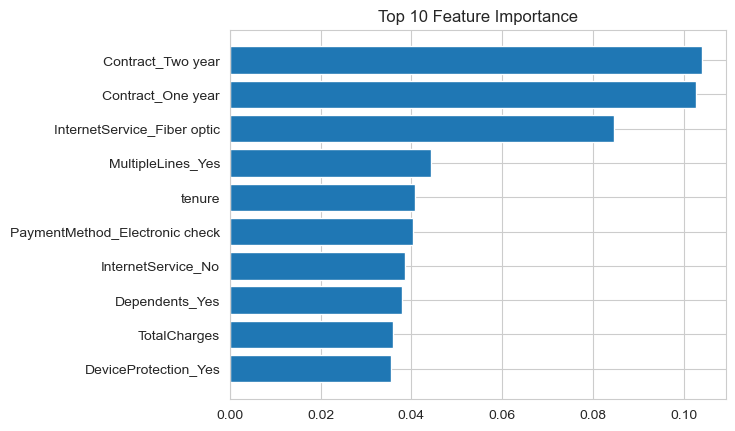

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv('data_set/churn_dataset.csv')

# Check missing values
df.isnull().sum()

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# EDA: Churn distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Encoding categorical features
df_encoded = pd.get_dummies(df.drop(['customerID'], axis=1), drop_first=True)

# Train-test split
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model XGBoost
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title('Top 10 Feature Importance')
plt.show()